<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# 1 For the "Median value of owner-occupied homes" provide a boxplot

21.2


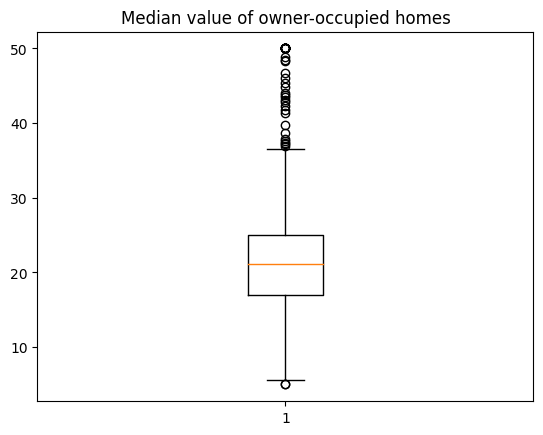

In [13]:
print(boston_df['MEDV'].median())
plt.boxplot(boston_df['MEDV'])
plt.title("Median value of owner-occupied homes")
plt.show()

# Finding - From the box plot, the median value of owner occupied houses is around 21. The plot places values above 38 (approximately) as outliers

# 2 Provide a  bar plot for the Charles river variable

35


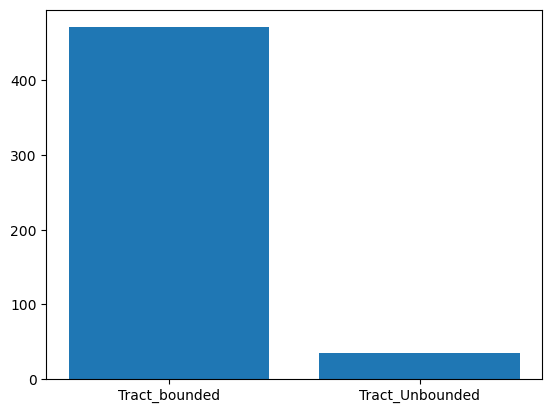

In [69]:
import numpy as np
df = boston_df
x = df[df['CHAS'] == 0]['CHAS'].count()

y = df[df['CHAS'] == 1]['CHAS'].count()
print(y)
df1 = np.array([x,y])
plt.bar(['Tract_bounded','Tract_Unbounded'],df1)
plt.show()

# The Charles river variable count is higher for tract bounds river with a value over 400 when compared to tract unbounds river

# 3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<ipython-input-35-f0dd352fb180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE_GP'] = pd.cut(df['AGE'],bins=[0,35,70,100],labels=['<35','between 35 and 70','>70'])


<Figure size 800x600 with 0 Axes>

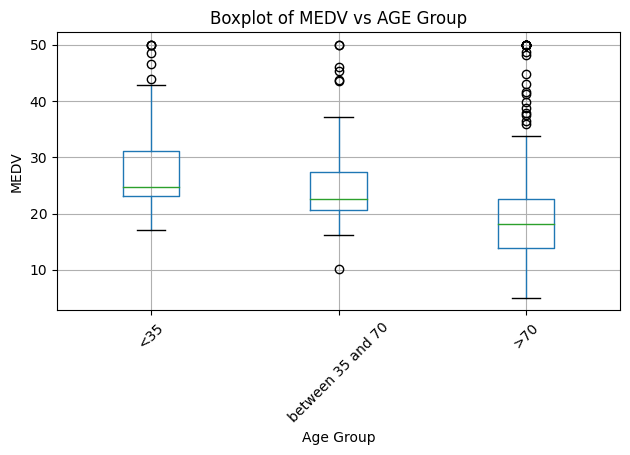

In [35]:
df = boston_df[['MEDV','AGE']]
df['AGE_GP'] = pd.cut(df['AGE'],bins=[0,35,70,100],labels=['<35','between 35 and 70','>70'])
df  
# Plot the boxplot
plt.figure(figsize=(8, 6))
df.boxplot(column='MEDV', by='AGE_GP')
plt.title('Boxplot of MEDV vs AGE Group')
plt.suptitle('')  # Remove default title
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Findings MEDV - Median value of owner-occupied homes (in $1000's) is highest for the age groups less than 35 and least for people over 70



# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

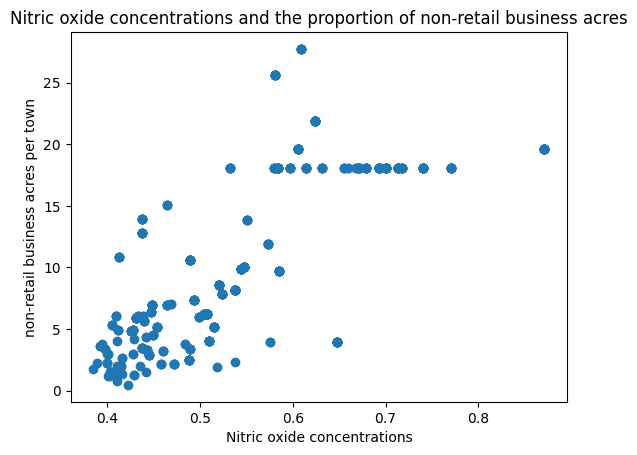

In [39]:
df = boston_df[['NOX','INDUS']]
plt.scatter(df['NOX'],df['INDUS'])
plt.xlabel('Nitric oxide concentrations')
plt.ylabel('non-retail business acres per town')
plt.title('Nitric oxide concentrations and the proportion of non-retail business acres')
plt.show()

# From the scatterplot the two variables show a linear relationship. As the nitric oxide concentration increases, the non-retail business acres per town are also increasing linearly.

# 4 Create a histogram for the pupil to teacher ratio variable PTRATIO

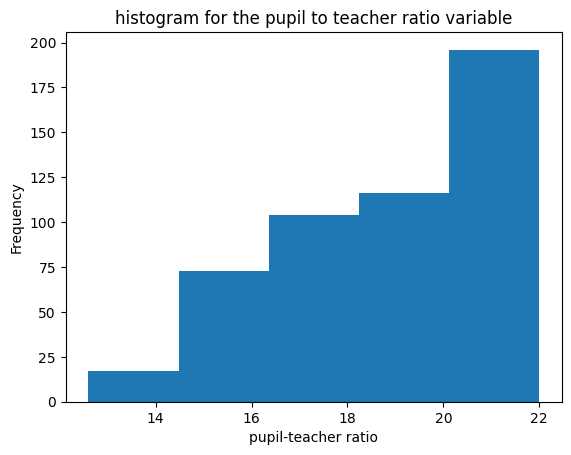

In [46]:
df = boston_df['PTRATIO']
df
plt.hist(df, bins=5)
plt.title('histogram for the pupil to teacher ratio variable')
plt.xlabel('pupil-teacher ratio')
plt.ylabel('Frequency')
plt.show()

# The highest pupil teacher ratio per town is 22 for almost 200 towns

# Task 3 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [72]:
from scipy.stats import ttest_ind
df1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
n1 = 471
df2 = boston_df[boston_df['CHAS'] == 0]['MEDV']
n2 = 35
dof = n1+n2 - 2
#H0:Null Hypothesis - There is no significant difference between the median value of houses bounded by Charles river
#H1 Alternate hypothesis - There is significant difference between the median value of houses bounded by Charles river
t_test_stat,p_value = ttest_ind(df1,df2)
print(t_test_stat,p_value)

3.996437466090509 7.390623170519905e-05


# Finding : Since the p_value < 0.05 we reject the null hypothesis using the t test for independent samples. There is a significant difference in the median value of houses bounded by Charles river.

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [81]:
#H0 Null Hypothesis - 
df = boston_df[['AGE','MEDV']]
df['AGE_GP'] = pd.cut(boston_df['AGE'],bins = [0,35,70,100],labels=['<35','35-70','>70'])
from statsmodels.formula.api import ols
formula = 'MEDV ~ C(AGE_GP)'
model = ols(formula,df).fit()
from statsmodels.stats.anova import anova_lm
anova_table = anova_lm(model,typ = 2)
#print(anova_table)
from scipy.stats import f_oneway
group1 = df[df['AGE_GP'] == '<35']['MEDV']
group2 = df[df['AGE_GP'] == '35-70']['MEDV']
group3 = df[df['AGE_GP'] == '>70']['MEDV']
test_stat,p_value = f_oneway(group1,group2,group3)
print(p_value)

<ipython-input-81-f2c04b73b11e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE_GP'] = pd.cut(boston_df['AGE'],bins = [0,35,70,100],labels=['<35','35-70','>70'])


1.7105011022702984e-15


# Since p_value < 0.05 we reject the null hypothesis ie there is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

In [83]:
boston_df['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64